In [45]:
from nltk.tokenize import word_tokenize
import nltk
import collections
from nltk.corpus import stopwords
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
import spacy
#from polyglot.text import Text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import re
import matplotlib.pyplot as plt
import itertools
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
#import the data we get from the airbnb websites
df = pd.read_excel('airbnb_data.xlsx')
df.head()

,House_id,customer_id,reviews,price
0,834190,220463606,My friend and I landed at JFK at 11pm - but Ca...,153
1,834190,27485126,My daughter and I just returned from staying w...,153
2,834190,143743348,The hosts and space are very welcoming! You’ll...,153
3,834190,95468109,"Marc and Carol were awesome hosts, the loft wa...",153
4,834190,56073091,"Lovely people and a lovely place, very accessi...",153


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 4 columns):
House_id       105 non-null int64
customer_id    105 non-null int64
reviews        105 non-null object
price          105 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.4+ KB


In [21]:
reviews = df['reviews']
print(reviews)

0      My friend and I landed at JFK at 11pm - but Ca...
1      My daughter and I just returned from staying w...
2      The hosts and space are very welcoming! You’ll...
3      Marc and Carol were awesome hosts, the loft wa...
4      Lovely people and a lovely place, very accessi...
5      Carol's place was clean and welcoming. they le...
6      Carol and Marc were wonderful. They are very g...
7      Missing part of sofa, no air bed, bugs all ove...
8      The live-in host, LA, was a great guy. Super l...
9      It was an amazing time. We sat and shared conv...
10     Great location in a very cool neighborhood. Ea...
11                              Great, amazing location.
12      Great place to stay! Clean and just as described
13     Great location for Fleet Week. Had a wonderful...
14     I was very pleased with my experience here. I ...
15                                  A good host overall.
16     Jj was the best possible guest. The space was ...
17                Everything wa

In [22]:
# using re to break sentences into words for every sentence.
all_words = []
for i in reviews:
    review_split = re.split('\s+', i)
    all_words.append(review_split)
print(len(all_words))
all_words[0]

105


['My',
 'friend',
 'and',
 'I',
 'landed',
 'at',
 'JFK',
 'at',
 '11pm',
 '-',
 'but',
 'Carol',
 'was',
 'super',
 'accommodating',
 'and',
 'stayed',
 'up',
 'late',
 'to',
 'let',
 'us',
 'in.',
 'The',
 'apartment',
 'is',
 'beautiful',
 'and',
 'super',
 'clean.',
 'It',
 'was',
 'spacious,',
 'bright',
 'and',
 'Carol',
 'and',
 'Matt',
 'were',
 'both',
 'super',
 'friendly',
 'and',
 'fun',
 'to',
 'chat',
 'to',
 '-',
 'which',
 'is',
 'a',
 'bonus.',
 'The',
 'location',
 'of',
 'the',
 'apartment',
 'is',
 'also',
 'great,',
 'with',
 'much',
 'happening',
 '(especially',
 'and',
 'most',
 'importantly',
 'regarding',
 'the',
 'food',
 'scene).',
 "I'd",
 'definitely',
 'stay',
 'here',
 'again',
 'and',
 'recommend',
 'the',
 'spot',
 'to',
 'everyone',
 'else.',
 'Thanks',
 'for',
 'helping',
 'make',
 'a',
 'great',
 'trip',
 'even',
 'better!']

In [23]:
line_num_words = [len(t_line) for t_line in all_words]

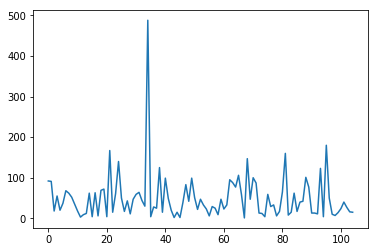

In [24]:
_ = plt.plot(line_num_words)
plt.show()

In [25]:
# using word_tokenize to break sentences into words.
for i in reviews:
    review_split = word_tokenize(i)
    print(review_split)


['My', 'friend', 'and', 'I', 'landed', 'at', 'JFK', 'at', '11pm', '-', 'but', 'Carol', 'was', 'super', 'accommodating', 'and', 'stayed', 'up', 'late', 'to', 'let', 'us', 'in', '.', 'The', 'apartment', 'is', 'beautiful', 'and', 'super', 'clean', '.', 'It', 'was', 'spacious', ',', 'bright', 'and', 'Carol', 'and', 'Matt', 'were', 'both', 'super', 'friendly', 'and', 'fun', 'to', 'chat', 'to', '-', 'which', 'is', 'a', 'bonus', '.', 'The', 'location', 'of', 'the', 'apartment', 'is', 'also', 'great', ',', 'with', 'much', 'happening', '(', 'especially', 'and', 'most', 'importantly', 'regarding', 'the', 'food', 'scene', ')', '.', 'I', "'d", 'definitely', 'stay', 'here', 'again', 'and', 'recommend', 'the', 'spot', 'to', 'everyone', 'else', '.', 'Thanks', 'for', 'helping', 'make', 'a', 'great', 'trip', 'even', 'better', '!']
['My', 'daughter', 'and', 'I', 'just', 'returned', 'from', 'staying', 'with', 'Carol', 'and', 'Marc', '.', 'From', 'beginning', 'to', 'end', 'it', 'was', 'a', 'perfect', 'exp

In [26]:
all_count = []
for i in all_words:
    word_count = Counter(i)
    all_count.append(word_count)

print(all_count[0].most_common(2))

[('and', 8), ('to', 4)]


In [27]:
list_tokens = []
list_nostop = []
for n in reviews:
    tokens = [w for w in word_tokenize(n.lower()) if w.isalpha()]
    list_tokens.append(tokens)
    no_stops = [t for t in tokens if t not in stopwords.words('english')]
    list_nostop.append(no_stops)

In [28]:
list_nostop

[['friend',
  'landed',
  'jfk',
  'carol',
  'super',
  'accommodating',
  'stayed',
  'late',
  'let',
  'us',
  'apartment',
  'beautiful',
  'super',
  'clean',
  'spacious',
  'bright',
  'carol',
  'matt',
  'super',
  'friendly',
  'fun',
  'chat',
  'bonus',
  'location',
  'apartment',
  'also',
  'great',
  'much',
  'happening',
  'especially',
  'importantly',
  'regarding',
  'food',
  'scene',
  'definitely',
  'stay',
  'recommend',
  'spot',
  'everyone',
  'else',
  'thanks',
  'helping',
  'make',
  'great',
  'trip',
  'even',
  'better'],
 ['daughter',
  'returned',
  'staying',
  'carol',
  'marc',
  'beginning',
  'end',
  'perfect',
  'experience',
  'felt',
  'safe',
  'well',
  'taken',
  'care',
  'carol',
  'gave',
  'us',
  'perfect',
  'instructions',
  'go',
  'places',
  'got',
  'us',
  'comfortable',
  'navigating',
  'subway',
  'home',
  'comfortable',
  'clean',
  'inviting',
  'marc',
  'lots',
  'information',
  'great',
  'stories',
  'daughter',


In [29]:
nostops_count = []
for i in list_nostop:
    word_count = Counter(i)
    nostops_count.append(word_count)

print(nostops_count[0].most_common(2))
print(nostops_count[0])

[('super', 3), ('carol', 2)]
Counter({'super': 3, 'carol': 2, 'apartment': 2, 'great': 2, 'friend': 1, 'landed': 1, 'jfk': 1, 'accommodating': 1, 'stayed': 1, 'late': 1, 'let': 1, 'us': 1, 'beautiful': 1, 'clean': 1, 'spacious': 1, 'bright': 1, 'matt': 1, 'friendly': 1, 'fun': 1, 'chat': 1, 'bonus': 1, 'location': 1, 'also': 1, 'much': 1, 'happening': 1, 'especially': 1, 'importantly': 1, 'regarding': 1, 'food': 1, 'scene': 1, 'definitely': 1, 'stay': 1, 'recommend': 1, 'spot': 1, 'everyone': 1, 'else': 1, 'thanks': 1, 'helping': 1, 'make': 1, 'trip': 1, 'even': 1, 'better': 1})


In [30]:
dictionary = Dictionary(list_nostop)
corpus = [dictionary.doc2bow(i) for i in list_nostop]

In [31]:
corpus

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 3),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(3, 1),
  (7, 2),
  (9, 1),
  (19, 1),
  (36, 1),
  (41, 2),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1)],
 [(37, 1), (49, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)],
 

In [32]:
doc = corpus[0] # the first review 
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [33]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

super 3
apartment 2
carol 2
great 2
accommodating 1


In [34]:
# Create the defaultdict: total_word_count
total_word_count = collections.defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 
# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

great 62
place 49
clean 41
stay 38
location 36


In [35]:
## Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [36]:
tfidf[corpus[0]]

[(0, 0.11733930195570799),
 (1, 0.11101971296828007),
 (2, 0.1319616120897441),
 (3, 0.12481378928055756),
 (4, 0.1457556884020216),
 (5, 0.1907945953254296),
 (6, 0.162378208879116),
 (7, 0.23467860391141598),
 (8, 0.1907945953254296),
 (9, 0.038552327155979914),
 (10, 0.10071678147861358),
 (11, 0.1907945953254296),
 (12, 0.12481378928055756),
 (13, 0.13396182243280236),
 (14, 0.1907945953254296),
 (15, 0.162378208879116),
 (16, 0.1907945953254296),
 (17, 0.11733930195570799),
 (18, 0.1457556884020216),
 (19, 0.05920952944020974),
 (20, 0.1907945953254296),
 (21, 0.1907945953254296),
 (22, 0.1907945953254296),
 (23, 0.162378208879116),
 (24, 0.1907945953254296),
 (25, 0.1457556884020216),
 (26, 0.1457556884020216),
 (27, 0.04622728519719927),
 (28, 0.1457556884020216),
 (29, 0.1907945953254296),
 (30, 0.13396182243280236),
 (31, 0.09639740283424393),
 (32, 0.1907945953254296),
 (33, 0.1907945953254296),
 (34, 0.13396182243280236),
 (35, 0.11733930195570799),
 (36, 0.04871266309386149

In [37]:
# Calculate the tfidf weights of doc(first documents): tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(0, 0.11733930195570799), (1, 0.11101971296828007), (2, 0.1319616120897441), (3, 0.12481378928055756), (4, 0.1457556884020216)]
super 0.2891922085027318
carol 0.23467860391141598
bonus 0.1907945953254296
chat 0.1907945953254296
else 0.1907945953254296


In [38]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in nostops_count]
print(len(pos_sentences))
print(pos_sentences)

105
[[('friend', 'NN'), ('landed', 'VBD'), ('jfk', 'JJ'), ('carol', 'NN'), ('super', 'NN'), ('accommodating', 'VBG'), ('stayed', 'VBN'), ('late', 'JJ'), ('let', 'NN'), ('us', 'PRP'), ('apartment', 'VB'), ('beautiful', 'JJ'), ('clean', 'JJ'), ('spacious', 'JJ'), ('bright', 'JJ'), ('matt', 'NNS'), ('friendly', 'RB'), ('fun', 'VBP'), ('chat', 'RB'), ('bonus', 'JJ'), ('location', 'NN'), ('also', 'RB'), ('great', 'JJ'), ('much', 'JJ'), ('happening', 'VBG'), ('especially', 'RB'), ('importantly', 'RB'), ('regarding', 'VBG'), ('food', 'NN'), ('scene', 'NN'), ('definitely', 'RB'), ('stay', 'JJ'), ('recommend', 'VBP'), ('spot', 'NN'), ('everyone', 'NN'), ('else', 'RB'), ('thanks', 'VBZ'), ('helping', 'VBG'), ('make', 'VB'), ('trip', 'NN'), ('even', 'RB'), ('better', 'RBR')], [('daughter', 'NN'), ('returned', 'VBD'), ('staying', 'VBG'), ('carol', 'NN'), ('marc', 'NN'), ('beginning', 'VBG'), ('end', 'JJ'), ('perfect', 'JJ'), ('experience', 'NN'), ('felt', 'VBD'), ('safe', 'JJ'), ('well', 'RB'), ('

In [39]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary=True)

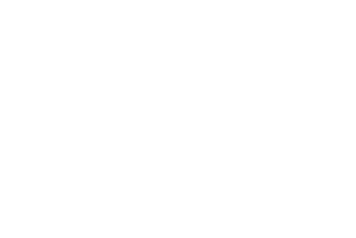

In [41]:
# Create the defaultdict: ner_categories
ner_categories = collections.defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()
    

In [ ]:
# Instantiate the English model: nlp
nlp = spacy.load('en',tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'],df['price'],test_size = 0.33,random_state = 53)


In [48]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)

In [49]:
print(count_vectorizer.get_feature_names()[:10])

['00', '10', '10p', '12', '145th', '2nd', '30', '70', 'able', 'abnb']


In [51]:


# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)


# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '10', '10p', '12', '145th', '2nd', '30', '70', 'able', 'abnb']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.12201143 0.         0.         ... 0.09267731 0.12201143 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [52]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns= tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   00  10  10p  12  145th  2nd  30  70  able  abnb  ...   working  works  \
0   0   0    0   0      0    0   0   0     0     0  ...         0      0   
1   0   0    0   0      0    0   0   0     0     0  ...         0      0   
2   0   0    0   0      0    0   0   0     0     0  ...         0      0   
3   1   0    0   0      0    0   0   0     0     0  ...         0      1   
4   0   0    0   0      0    0   0   0     0     0  ...         0      0   

   world  worries  worrying  wouldn  yellow  york  yorker  zero  
0      0        0         0       0       0     0       0     0  
1      0        0         0       0       0     0       0     0  
2      0        0         0       0       0     0       0     0  
3      0        0         0       0       0     1       1     0  
4      0        0         0       0       0     0       0     0  

[5 rows x 720 columns]
         00   10  10p   12  145th  2nd   30   70  able  abnb  ...   working  \
0  0.000000  0.0  0.0  0.0    0.0  0.0  0.0 